<a href="https://colab.research.google.com/github/Uberwald/Analytics/blob/main/6_1_2_%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans #
from sklearn.datasets import make_blobs #создаём датасет сами

import matplotlib.pyplot as plt #

Установка датчика случайных чисел

In [ ]:
np.random.seed(40)

Генерация случайных кластеров

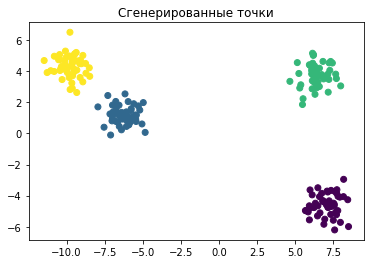

In [ ]:
X, y = make_blobs(
    n_samples = 200, n_features = 2, #200 точек, с 2 признаками
    centers = 4, cluster_std = 0.7, #мы сами задали, что в массиве 4 кластера, но машина пока этого не знает
    #0.7 - разброс данных, стандартное отклонение
    shuffle = True
)

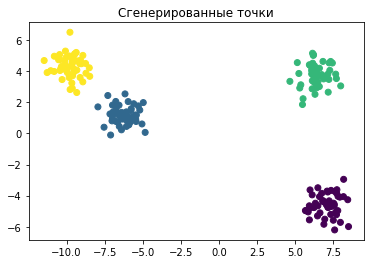

In [ ]:
plt.title("Сгенерированные точки")
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()

In [ ]:
X #неразмеченные данные, без какой-либо разметки

array([[ -6.65267786,   0.74165379],
       [ -6.77144047,   2.0595406 ],
       [  6.21660827,   3.70024663],
       [  7.61028087,  -3.73145666],
       [ -8.9353479 ,   3.32007461],
       [-10.37806727,   4.18724941],
       [  7.21855172,   3.47770951],
       [-10.43275334,   4.7553618 ],
       [  7.7128036 ,   3.53278516],
       [ -9.6363193 ,   4.5276274 ],
       [  6.56182588,   3.69842389],
       [ -7.10933435,  -0.10006079],
       [  7.34111734,  -5.21140334],
       [ -6.38923441,   1.35401997],
       [  5.24829927,   3.85981081],
       [  5.98209804,  -3.633916  ],
       [ -5.91180911,   0.55174698],
       [  7.99464167,   3.06019093],
       [  7.14796245,   3.81348761],
       [ -6.55624155,   1.81906164],
       [  5.93482664,  -4.65656794],
       [  5.1465099 ,   4.56011176],
       [  5.71360543,  -4.97796739],
       [ -6.52145195,   1.19010688],
       [  6.27715594,   4.35025795],
       [  7.36302847,  -3.66404972],
       [ -9.77899167,   6.51353136],
 

In [ ]:
y #правильные ответы, принадлежность точек кластерам 

array([1, 1, 2, 0, 3, 3, 2, 3, 2, 3, 2, 1, 0, 1, 2, 0, 1, 2, 2, 1, 0, 2,
       0, 1, 2, 0, 3, 0, 0, 1, 3, 2, 2, 2, 2, 2, 3, 2, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 2, 1, 1, 2, 3, 1, 3, 3, 2, 0, 2, 0, 3, 3, 2, 3, 3, 1,
       3, 1, 1, 3, 2, 1, 2, 3, 1, 2, 3, 2, 2, 0, 3, 0, 1, 2, 1, 0, 1, 1,
       1, 0, 3, 3, 1, 1, 2, 3, 0, 0, 2, 1, 1, 2, 1, 1, 3, 2, 3, 1, 3, 3,
       1, 3, 1, 3, 0, 1, 0, 2, 0, 0, 3, 1, 3, 0, 3, 0, 0, 3, 1, 0, 3, 0,
       2, 0, 0, 1, 2, 3, 2, 0, 1, 3, 0, 0, 0, 2, 2, 0, 3, 2, 2, 3, 1, 3,
       1, 2, 0, 0, 3, 3, 3, 2, 0, 0, 0, 0, 2, 2, 1, 2, 1, 1, 3, 1, 1, 0,
       3, 3, 2, 1, 1, 3, 3, 1, 2, 0, 2, 3, 2, 1, 2, 0, 0, 3, 3, 2, 1, 2,
       3, 1])

Запуск алгоритма k-средних

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'random', n_init = 10, max_iter = 300, tol = 1e-04)
#n_clusters - мы задаем предполагаемое количество кластеров
#n_init - начальная инициализация центров кластеризации 
#алгоритм рандомно разбрасывает четыре центра кластеров, сдвигаясь по мере итерации

kmeans_prediction = kmeans.fit_predict(X)
#fit - отвечает за обучение и подстройку параметров
#predict - отвечает за предсказания

In [ ]:
kmeans_prediction

array([2, 2, 1, 3, 0, 0, 1, 0, 1, 0, 1, 2, 3, 2, 1, 3, 2, 1, 1, 2, 3, 1,
       3, 2, 1, 3, 0, 3, 3, 2, 0, 1, 1, 1, 1, 1, 0, 1, 3, 3, 3, 3, 2, 3,
       3, 3, 3, 2, 1, 2, 2, 1, 0, 2, 0, 0, 1, 3, 1, 3, 0, 0, 1, 0, 0, 2,
       0, 2, 2, 0, 1, 2, 1, 0, 2, 1, 0, 1, 1, 3, 0, 3, 2, 1, 2, 3, 2, 2,
       2, 3, 0, 0, 2, 2, 1, 0, 3, 3, 1, 2, 2, 1, 2, 2, 0, 1, 0, 2, 0, 0,
       2, 0, 2, 0, 3, 2, 3, 1, 3, 3, 0, 2, 0, 3, 0, 3, 3, 0, 2, 3, 0, 3,
       1, 3, 3, 2, 1, 0, 1, 3, 2, 0, 3, 3, 3, 1, 1, 3, 0, 1, 1, 0, 2, 0,
       2, 1, 3, 3, 0, 0, 0, 1, 3, 3, 3, 3, 1, 1, 2, 1, 2, 2, 0, 2, 2, 3,
       0, 0, 1, 2, 2, 0, 0, 2, 1, 3, 1, 0, 1, 2, 1, 3, 3, 0, 0, 1, 2, 1,
       0, 2], dtype=int32)

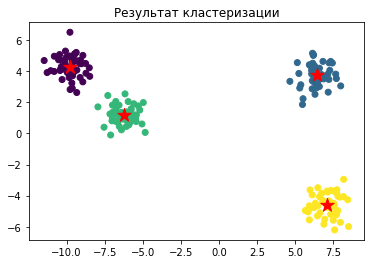

In [ ]:
plt.title("Результат кластеризации")
plt.scatter(X[:,0], X[:, 1], c = kmeans_prediction) #отрисовываем точки
plt.scatter(*kmeans.cluster_centers_.T, marker = '*', s = 200, color='r') #рисовка центров кластеров
plt.show() 

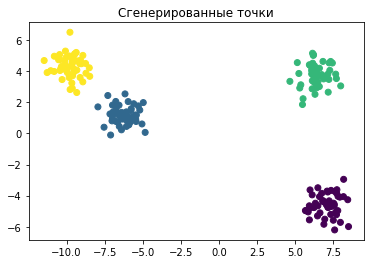

In [ ]:
plt.title("Сгенерированные точки")
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()

Использование метода локтя для получения количества кластеров

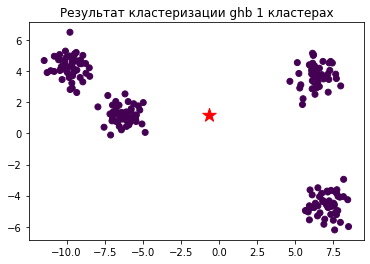

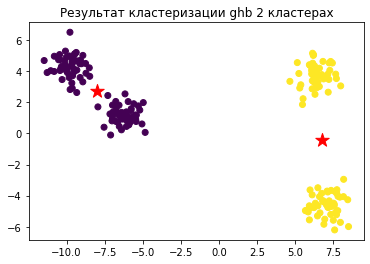

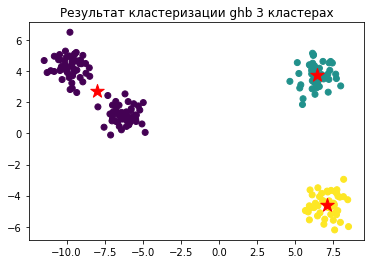

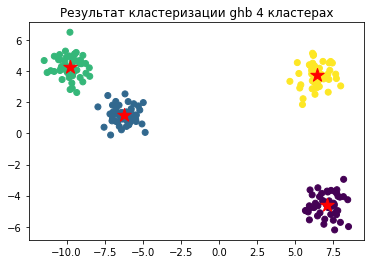

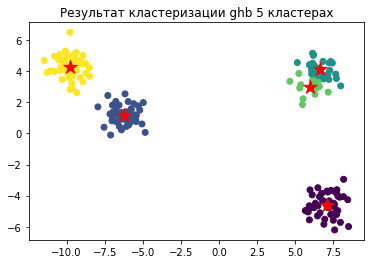

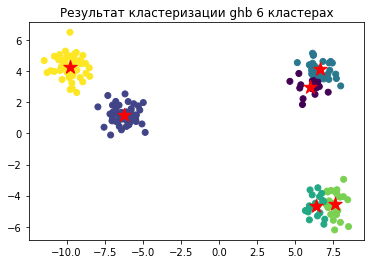

In [ ]:
distortions = []
for i in range(1, 7):
  kmeans = KMeans(n_clusters=i, init = 'random', n_init=10, max_iter = 300, tol = 1e-04)
  kmeans_prediction = kmeans.fit_predict(X)
  plt.title(f"Результат кластеризации ghb {i} кластерах")
  plt.scatter(X[:,0], X[:, 1], c = kmeans_prediction) #отрисовываем точки
  plt.scatter(*kmeans.cluster_centers_.T, marker = '*', s = 200, color='r') #рисовка центров кластеров
  plt.show() 
  distortions.append(kmeans.inertia_)

Примнение метода локтя

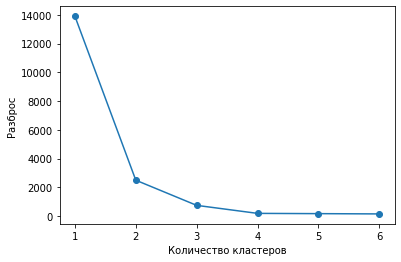

In [ ]:
plt.plot(range(1, 7), distortions, marker = 'o')
plt.xlabel('Количество кластеров')
plt.ylabel('Разброс')
plt.show()
#Смотрим когда разброс перестает уменьшаться существенно, то есть когда разброс между кластерами наименьший